In [3]:
import pandas as pd 
import geopandas as gpd
from scipy.io import mmread
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt 

# Toronto 
### Cases

In [2]:
df_tor = pd.read_csv("Data/CasesToronto.csv")
#df_tor["Neighbourhood Name"].value_counts()
#df_tor.Outcome.value_counts()
df_tor.columns

Index(['_id', 'Assigned_ID', 'Outbreak Associated', 'Age Group',
       'Neighbourhood Name', 'FSA', 'Source of Infection', 'Classification',
       'Episode Date', 'Reported Date', 'Client Gender', 'Outcome',
       'Currently Hospitalized', 'Currently in ICU', 'Currently Intubated',
       'Ever Hospitalized', 'Ever in ICU', 'Ever Intubated'],
      dtype='object')

In [4]:
traffic_toronto = gpd.read_file("Data/2019-04-01-Toronto.geojson")
traffic_toronto = traffic_toronto.iloc[1:]

In [5]:
traffic_toronto = traffic_toronto.drop(["jobName", "creationTime", "userPreference", "dateRanges", "timeSets", "networkName", "zoneId", "probeSource", "segmentId"], axis = 1)

In [6]:
traffic_toronto.head()

,newSegmentId,speedLimit,frc,streetName,distance,segmentTimeResults,geometry
1,-0000434f-5000-0400-0000-000000a7daf6,60.0,3.0,Steeles Ave W,46.29,"[ { ""timeSet"": 2, ""dateRange"": 1, ""harmonicAve...","LINESTRING (-79.52444 43.77480, -79.52388 43.7..."
2,-0000434f-5000-0400-0000-000000a7daff,60.0,3.0,Steeles Ave W,59.18,"[ { ""timeSet"": 2, ""dateRange"": 1, ""harmonicAve...","LINESTRING (-79.46387 43.78851, -79.46316 43.7..."
3,-0000434f-5000-0400-0000-000000a7db02,60.0,4.0,Steeles Ave E,52.77,"[ { ""timeSet"": 2, ""dateRange"": 1, ""harmonicAve...","LINESTRING (-79.30009 43.82530, -79.30072 43.8..."
4,-0000434f-5000-0400-0000-000000a7db0d,60.0,3.0,Steeles Ave W,36.22,"[ { ""timeSet"": 2, ""dateRange"": 1, ""harmonicAve...","LINESTRING (-79.53222 43.77324, -79.53211 43.7..."
5,-0000434f-5000-0400-0000-000000a7db18,60.0,3.0,Steeles Ave W,49.58,"[ { ""timeSet"": 2, ""dateRange"": 1, ""harmonicAve...","LINESTRING (-79.63014 43.75182, -79.62955 43.7..."


In [ ]:
traffic_toronto.segmentTimeResults[1]

'[ { "timeSet": 2, "dateRange": 1, "harmonicAverageSpeed": 16.820000, "medianSpeed": 31.200000, "averageSpeed": 32.780000, "standardDeviationSpeed": 19.390000, "travelTimeStandardDeviation": 15.410000, "sampleSize": 1772, "averageTravelTime": 9.910000, "medianTravelTime": 5.340000, "travelTimeRatio": 1.000000, "speedPercentiles": [ 5, 7, 9, 14, 18, 21, 24, 28, 29, 31, 32, 32, 37, 47, 50, 54, 57, 57, 64 ] } ]'

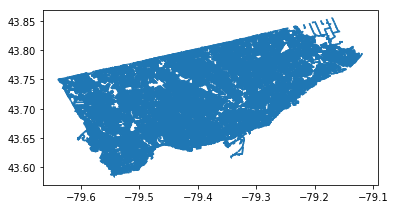

In [ ]:
traffic_toronto.plot()

In [ ]:
# http://polygons.openstreetmap.fr/index.py?id=43992 , polygon creation from osm id (turin = 43992)
boundary_toronto = gpd.read_file("Data/Toronto.geojson")
#bbox = boundary_turin.envelope 
#df_bbox = gpd.GeoDataFrame(gpd.GeoSeries(bbox), columns = ["geometry"])
#intersections = gpd.overlay(df_bbox, DF_roads_turin, how = "intersection")

In [ ]:
# bbox = (7.25,44.8,8.1,45.4)
DF_roads_toronto = gpd.read_file("Data/ontario-latest-free.shp/gis_osm_roads_free_1.shp", bbox = boundary_toronto)
DF_buildings_toronto = gpd.read_file("Data/ontario-latest-free.shp/gis_osm_buildings_a_free_1.shp", bbox = boundary_toronto)
# ferrovie di treni e tram
DF_railway_toronto = gpd.read_file("Data/ontario-latest-free.shp/gis_osm_railways_free_1.shp", bbox = boundary_toronto)
#parcheggi, anche multipiano
DF_parking_toronto = gpd.read_file("Data/ontario-latest-free.shp/gis_osm_traffic_a_free_1.shp", bbox = boundary_toronto)

# suburbs --> nella parte di sincronizzazione tra le misure restrittive, effetti lockdown 
DF_suburbs_toronto =  gpd.read_file("Data/ontario-latest-free.shp/gis_osm_places_a_free_1.shp", bbox = boundary_toronto)
# just in case
DF_churches_toronto = gpd.read_file("Data/ontario-latest-free.shp/gis_osm_pofw_a_free_1.shp", bbox = boundary_toronto)
# ospedali, parchi, teatri 
DF_public_places_toronto = gpd.read_file("Data/ontario-latest-free.shp/gis_osm_pois_a_free_1.shp", bbox = boundary_toronto)
# DF_public_places_toronto[DF_public_places_toronto.fclass == "hospital"]
# stazioni ferroviarie, fermate bus, tram, traghetto (lol?), taxi 
DF_transport_toronto = gpd.read_file("Data/ontario-latest-free.shp/gis_osm_transport_a_free_1.shp", bbox = boundary_toronto)

In [ ]:
DF_roads_toronto.to_file("Data/Toronto_final/Roads_Toronto.shp")
DF_buildings_toronto.to_file("Data/Toronto_final/Buildings_Toronto.shp")

In [ ]:
DF_public_places_toronto[DF_public_places_toronto.fclass == "hospital"].to_file("Data/Toronto_final/Hospitals_toronto.shp")

In [ ]:
print(DF_roads_toronto.shape)
print(DF_buildings_toronto.shape)
print(DF_railway_toronto.shape)
print(DF_parking_toronto.shape)

In [ ]:
# matplotlib qt permette di avere una figura interattiva
# %matplotlib qt

#%matplotlib inline

fig, ax = plt.subplots(figsize=(20, 20))
DF_roads_toronto.plot(ax = ax, alpha = 0.4, color = "black")
DF_buildings_toronto.plot(ax = ax, alpha = 0.8, color = "orange")
DF_public_places_toronto.plot(ax = ax , alpha = 0.6, color = "pink")
DF_parking_toronto.plot(ax = ax, alpha = 0.7, color = "blue")
DF_churches_toronto.plot(ax = ax, alpha = 0.7, color = "green")
DF_railway_toronto.plot(ax = ax, alpha = 0.4, color = "red")
fig.savefig("Toronto_Net.png", dpi = 300)
#ax.set_xlim([7.56, 7.78])
#ax.set_ylim([45, 45.155])